In [1]:
# **Setup and Initialization**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Collecting the data**
Load the train and test dataset from csv file to pandas dataframe

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

# Printing the first 5 rows of the train dataset.
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Analysis**

In [4]:
# Printing the Total rows and columns of training data
train_data.shape

(891, 12)

In [5]:
# getting some information about the training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


so, we can observe that there are some missing values in the table.
for example, Age column is missing for many rows.Out of 891 rows, the Age value is present only in 714 rows. 

In [6]:
# checking the nimber of the missing data in each column [for Training data]
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#getting some statistical measure about the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Cleanup Data**

In [8]:
# deleting unnecessary columns from the dataframe
train_data.drop(['Name','PassengerId','Ticket'], axis=1, inplace=True)

# deleting corrupted ( many missing values) columns from the dataframe
train_data.drop(['Cabin'], axis=1, inplace=True)

In [9]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# **Chart information for Features**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

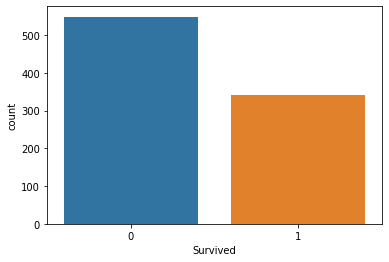

In [10]:
# making a chart for survived
import seaborn as sns
sns.countplot('Survived', data = train_data)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

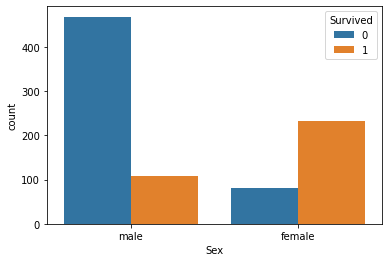

In [11]:
sns.countplot('Sex',hue='Survived', data= train_data)

The Chart shows that  Women more likely survivied than Men

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

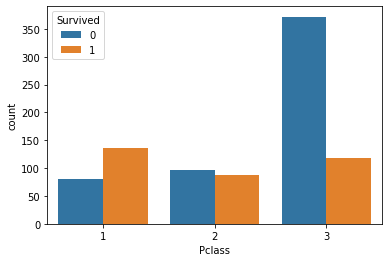

In [12]:
sns.countplot('Pclass',hue='Survived', data= train_data)

* The Chart shows that the **1st class** more likely survivied than other classes
* The Chart shows that the  **3rd class** more likely dead than other classes

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

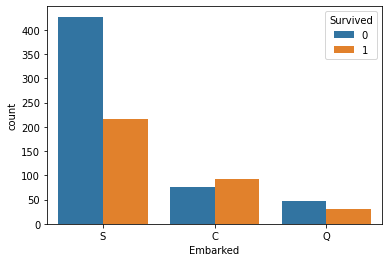

In [13]:
sns.countplot('Embarked',hue='Survived', data= train_data)

* The Chart confirms a person aboarded from C slightly more likely survived
* The Chart confirms a person aboarded from Q more likely dead
* The Chart confirms a person aboarded from S more likely dead

# **Replacing the missing values**

In [14]:
# replacing the missing values in age column with mean value

train_data['Age'].fillna(train_data['Age'].mean() , inplace=True )
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
# printing the most repeated value and its frist index
print(train_data['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [16]:
# replacing the missing values with the most repeated value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0] , inplace=True )

In [17]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now, we have no missing values in any column.

# **Replacing text to numerical**

In [18]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
# replacing male with 0 and female with 1
train_data.replace({'Sex':{'male':0,'female':1}}, inplace=True)

# replacing male with 0 and female with 1
train_data.replace({'Embarked':{'S':0,'C':1,'Q':3}}, inplace=True)



In [20]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# **Preper the model**

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# **Cross Validation**

In [22]:
# K-fold : new concept that i leared in this project form this documentation:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


# **Decision Tree Classifier**

In [23]:
tree = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(tree, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.83146067 0.78651685 0.75280899 0.78651685 0.78651685
 0.7752809  0.74157303 0.71910112 0.74157303]


In [24]:
round(np.mean(score), 2)

0.77

# **Nearest Neighbors Classifier**

In [25]:
knn = KNeighborsClassifier(n_neighbors = 9)
scoring = 'accuracy'
score = cross_val_score(knn, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.79775281 0.70786517 0.66292135 0.71910112 0.71910112
 0.73033708 0.75280899 0.71910112 0.74157303]


In [26]:
round(np.mean(score), 2)

0.73

# **Random Forest Classifier**

In [27]:
rand = RandomForestClassifier(n_estimators=12)
scoring = 'accuracy'
score = cross_val_score(rand, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.83146067 0.76404494 0.7752809  0.82022472 0.79775281
 0.80898876 0.7752809  0.76404494 0.82022472]


In [28]:
round(np.mean(score), 2)

0.79

# **Naive Bayes Classifier**

In [29]:
naive = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(naive, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.78651685 0.7752809  0.75280899 0.78651685 0.78651685
 0.7752809  0.82022472 0.79775281 0.80898876]


In [30]:
round(np.mean(score), 2)

0.79

# **Support vector machine Classifier**

In [31]:
support= SVC()
scoring = 'accuracy'
score = cross_val_score(support, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.66666667 0.78651685 0.68539326 0.58426966 0.75280899 0.70786517
 0.70786517 0.68539326 0.59550562 0.62921348]


In [32]:
round(np.mean(score), 2)

0.68

# **Logistic Regression Classifier**

In [33]:
#source : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
reg=LogisticRegression(max_iter=150)
scoring = 'accuracy'
score = cross_val_score(reg, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.79775281 0.78651685 0.78651685 0.78651685 0.79775281
 0.75280899 0.83146067 0.79775281 0.84269663]


In [34]:
round(np.mean(score), 2)

0.8

***the most accurate classifier is RandomForestClassifier with accuracy of 81%***

# **Another Way to implement a classifier**

In [35]:
# Implementing on Logistic Regression Classifier. this way can run on any previous classifier
# source : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# spliting the data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=2)

log_reg =LogisticRegression()
#traing the the model with training data
log_reg.fit(X_train,y_train)

# prediction the train data
X_train_pred=log_reg.predict(X_train)

# acuracy of the model 
accuracy_model_train = accuracy_score(y_train,X_train_pred)
#accuracy_model_train= round(np.mean(accuracy_model_train), 2)
print(accuracy_model_train)

# prediction the test data
X_test_pred=log_reg.predict(X_test)

# acuracy of the model 
accuracy_model_test = accuracy_score(y_test,X_test_pred)
#accuracy_model_test= round(np.mean(accuracy_model_test), 2)
print(accuracy_model_test)

0.8089887640449438
0.7821229050279329


observation : when changing random_state , accuracy will change.
Ex: 
random_state=1
output :
0.7991573033707865
0.7988826815642458

# **Deep Neural Networks**

In [36]:
#source1: https://www.kaggle.com/code/ryanholbrook/binary-classification
#source2: https://www.kaggle.com/code/ahmedgabualnoor/exercise-binary-classification/edit

from tensorflow import keras
from tensorflow.keras import layers

input_shape = [X_train.shape[1]]
#Building Sequential Models
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    # the hidden ReLU layers
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    # the linear output layer 
    layers.Dense(1,activation='sigmoid'),
])

#add a loss function and optimizer with the model's compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    # how many epochs to wait before stopping
    patience=10,
    # minimium amount of change to count as an improvement
    min_delta=0.001,
    restore_best_weights=True,
)

# Now we're ready to start the training! We've told Keras to feed the optimizer 512 rows of the training data 
# at a time (the batch_size) and to do that 200 times all the way through the dataset (the epochs).
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

2022-08-11 17:35:26.573100: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-11 17:35:26.813829: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
2/2 [==============================] - 2s 325ms/step - loss: 0.8352 - binary_accuracy: 0.5478 - val_loss: 0.8208 - val_binary_accuracy: 0.4413
Epoch 2/200
2/2 [==============================] - 0s 44ms/step - loss: 0.5805 - binary_accuracy: 0.7542 - val_loss: 0.6769 - val_binary_accuracy: 0.5698
Epoch 3/200
2/2 [==============================] - 0s 41ms/step - loss: 0.5572 - binary_accuracy: 0.7809 - val_loss: 0.6187 - val_binary_accuracy: 0.7151
Epoch 4/200
2/2 [==============================] - 0s 42ms/step - loss: 0.5232 - binary_accuracy: 0.8034 - val_loss: 0.6135 - val_binary_accuracy: 0.6480
Epoch 5/200
2/2 [==============================] - 0s 42ms/step - loss: 0.5169 - binary_accuracy: 0.8006 - val_loss: 0.6242 - val_binary_accuracy: 0.6536
Epoch 6/200
2/2 [==============================] - 0s 42ms/step - loss: 0.4446 - binary_accuracy: 0.8174 - val_loss: 0.6190 - val_binary_accuracy: 0.6425
Epoch 7/200
2/2 [==============================] - 0s 40ms/step - loss: 0.4

# **Module Results**
* Decision Tree Classifier         (0.77)
* Nearest Neighbors Classifier     (0.73)
* ***Ramdom Forest Classifier         (0.81)***
* Naive Bayes Classifier           (0.79)
* Support vector machine Classifier (0.68)
* Logistic Regression Classifier (0.80)




